# Descriptives of Prolific Academic Annotators

In this notebook, we provide descriptives of the PA crowd coder sample.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set_style("whitegrid")
from matplotlib import pyplot as plt
plt.style.use('seaborn-paper')

Load highlights to get IDs of annotators.

In [2]:
coders_in_hl = pd.read_csv('data/highlights_raw.csv')
coders_in_hl = coders_in_hl[coders_in_hl.focus_duration >= 45*60]
coder_ids = coders_in_hl.coder_id.unique()

Load demographical data and match to highlight data.

In [3]:
df_mfq = pd.read_csv('data/pa_coder_mfq.csv')
df_mfq = df_mfq.rename(columns={'Unnamed: 0':'coder_id'})
df_mfq = df_mfq.set_index('coder_id')

df_swb = pd.read_csv('data/pa_coder_swb.csv')
df_swb = df_swb.rename(columns={'Unnamed: 0':'coder_id'})
df_swb = df_swb.set_index('coder_id')

df_survey = pd.read_csv('data/pa_coder_demographics.csv').set_index('coder_id')

pa_data = pd.read_excel('data/pa_participant_data.xlsx')
pa_data = pa_data.set_index('Participant id')

df = df_mfq.join(df_survey)
df = df.join(df_swb).reset_index().set_index('pa_id')
df = df.join(pa_data).set_index('coder_id')

In [4]:
# Match coders to highlights
df = df[df.index.isin(coder_ids)]
df = df[~df.index.duplicated(keep='first')]
del df['token']

In [5]:
df['Political Affiliation (US)'].value_counts() / len(df) * 100

Democrat      68.493151
Republican    21.135029
Other          5.479452
None           3.718200
MISSING        0.195695
Name: Political Affiliation (US), dtype: float64

In [6]:
pa_cols = ['Age','sex','Ethnicity','Religious Affiliation','Political Affiliation (US)','Sexual Orientation','Socioeconomic Status',
       'Vaccine Opinions 1','Vaccine Opinions 2', 'Charitable Giving']
mfq_cols = [c for c in df.columns if c.startswith('mfq')]
df = df[pa_cols+mfq_cols+['swb_total','demographics_ptx_thermometer']]

In [7]:
df.to_csv('data/pa_coder_complete.csv')

### Moral Foundation Questionnaire Responses

In [8]:
mfq = ['mfq_care','mfq_fairness','mfq_loyalty','mfq_authority','mfq_sanctity']

For the following analyses, only select coders that identified either as Democrat or Republican

In [9]:
box_mfq = df[mfq+['Political Affiliation (US)','sex']]
box_mfq = box_mfq[np.logical_or(box_mfq['Political Affiliation (US)']=='Democrat', box_mfq['Political Affiliation (US)']=='Republican')]
box_mfq.groupby('sex')['Political Affiliation (US)'].value_counts() 

sex     Political Affiliation (US)
Female  Democrat                      188
        Republican                     39
Male    Democrat                      162
        Republican                     69
Name: Political Affiliation (US), dtype: int64

In [10]:
b_mfq = pd.melt(box_mfq[mfq].reset_index(), id_vars='coder_id', var_name='MFQ', value_name='Salience').set_index('coder_id')
b_polx = pd.melt(box_mfq[['Political Affiliation (US)']].reset_index(), id_vars='coder_id', value_name='Political Affiliation').set_index('coder_id')
box_mfq = b_mfq.join(b_polx)

In [11]:
box_mfq.head()

,MFQ,Salience,variable,Political Affiliation
coder_id,,,,
549,mfq_care,26,Political Affiliation (US),Republican
549,mfq_fairness,28,Political Affiliation (US),Republican
549,mfq_loyalty,25,Political Affiliation (US),Republican
549,mfq_authority,26,Political Affiliation (US),Republican
549,mfq_sanctity,27,Political Affiliation (US),Republican


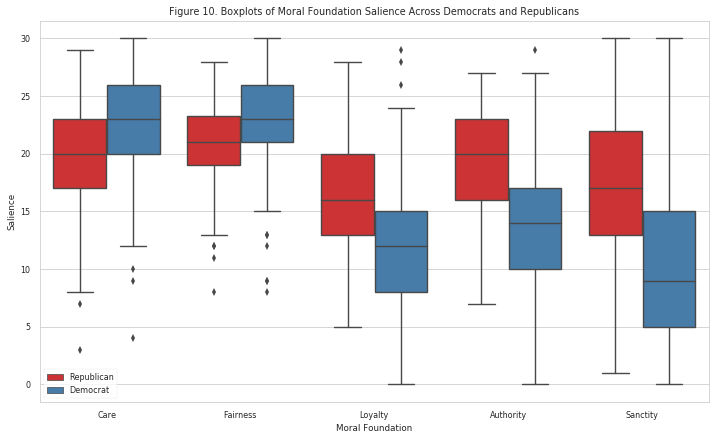

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(y="Salience", x="MFQ", hue="Political Affiliation", data = box_mfq, palette="Set1")
plt.ylabel('Salience')
plt.xlabel('Moral Foundation')
ax.set_xticklabels(['Care','Fairness','Loyalty','Authority','Sanctity'])
plt.title('Figure 10. Boxplots of Moral Foundation Salience Across Democrats and Republicans')
plt.legend(loc=3)
plt.show()

No handles with labels found to put in legend.


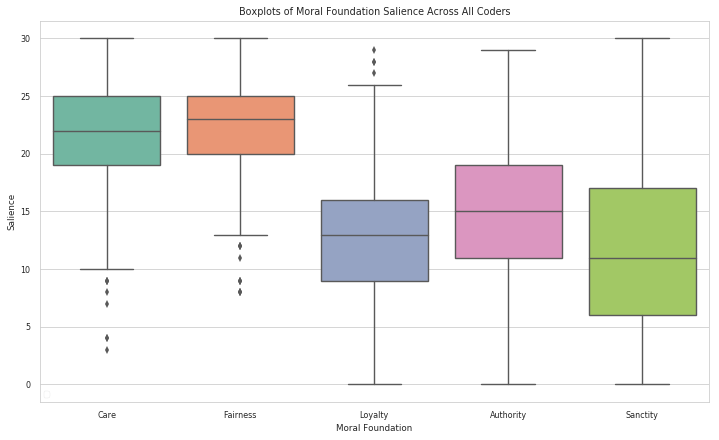

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(y="value", x="variable", data = pd.melt(df[mfq]), palette="Set2")
plt.ylabel('Salience')
plt.xlabel('Moral Foundation')
ax.set_xticklabels(['Care','Fairness','Loyalty','Authority','Sanctity'])
plt.title('Boxplots of Moral Foundation Salience Across All Coders')
plt.legend(loc=3)
plt.show()

### Society Works Best Responses

A simple additive index (-14 to 14) is constructed with directionality set so that a high score reflects a preference of a society that cares for its neediest members, tolerates outgroups, forgives rulebreakers, favors egalitarian leadership, and supports flexible moral codes.  This is labeled the SocialWorks Best Instrument (SWBI). 

**Note:** The directionality in the original SWBI is flipped.

In [14]:
box_swb = df[['swb_total','Political Affiliation (US)','sex']]
box_swb = box_swb[np.logical_or(box_swb['Political Affiliation (US)']=='Democrat', box_swb['Political Affiliation (US)']=='Republican')]

b_swb = pd.melt(box_swb['swb_total'].reset_index(), id_vars='coder_id', var_name='SWB', value_name='Index').set_index('coder_id')
b_polx = pd.melt(box_swb[['Political Affiliation (US)']].reset_index(), id_vars='coder_id', value_name='Political Affiliation').set_index('coder_id')
box_swb = b_swb.join(b_polx)

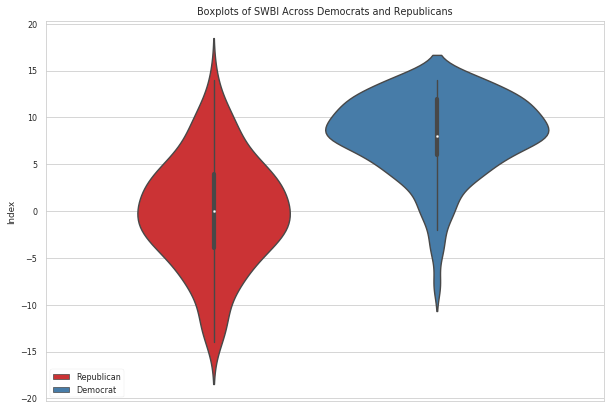

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.violinplot(y="Index", x="SWB", hue="Political Affiliation", data = box_swb, palette="Set1")

plt.ylabel('Index')
plt.xlabel('')
ax.set_xticklabels('')
plt.title('Boxplots of SWBI Across Democrats and Republicans')
plt.legend(loc=3)
plt.show()

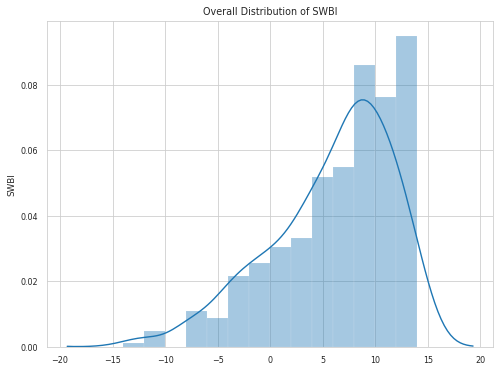

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['swb_total'])
plt.ylabel('SWBI')
plt.xlabel('')
plt.title('Overall Distribution of SWBI')
plt.show()

In [14]:
pairplt = df[mfq+['Political Affiliation (US)','swb_total']]
pairplt = pairplt[np.logical_or(pairplt['Political Affiliation (US)']=='Democrat', pairplt['Political Affiliation (US)']=='Republican')]

/usr/local/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'PairGrid' object has no attribute 'title'

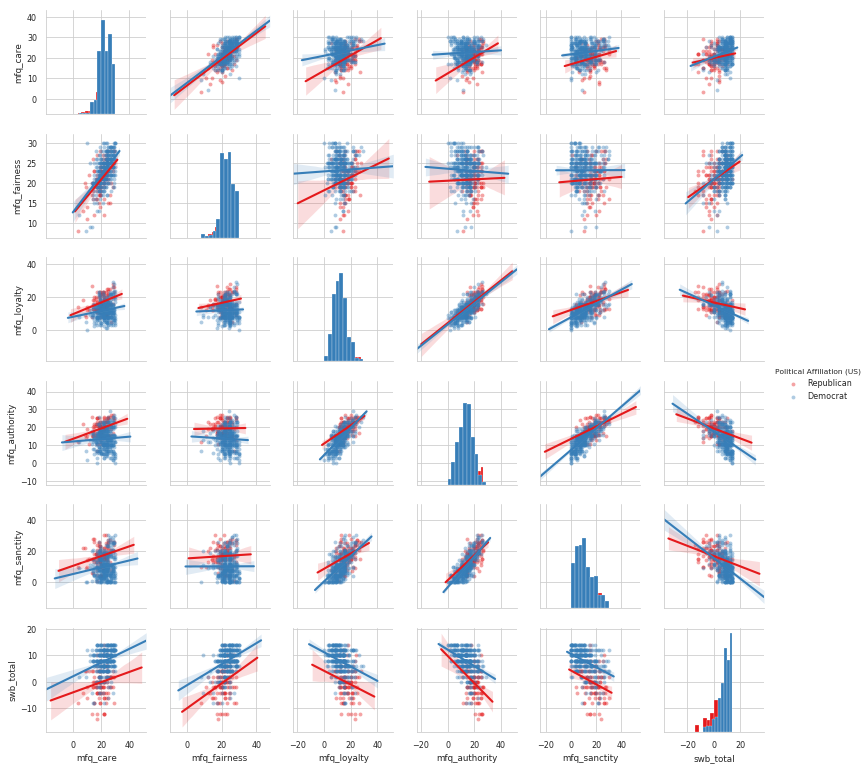

In [17]:
g= sns.pairplot(data=pairplt, palette='Set1', hue='Political Affiliation (US)',kind='reg', diag_kind="hist", size=1.8, 
             plot_kws={'scatter_kws': {'alpha': 0.4, 's':15}})
g.title('Figure 11. Pairplot between MFQ and SWB')
# plt.legend(loc=3)
plt.show()

### Age Distribution

In [19]:
df['Age'].describe()

count    503.000000
mean      32.986083
std       12.161013
min        3.000000
25%       24.000000
50%       29.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Figure 9. Distribution of Age')

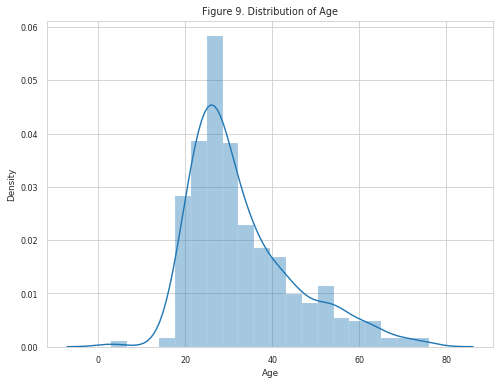

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(), kde=True)
plt.ylabel('Density')
plt.xlabel('Age')
plt.title('Figure 9. Distribution of Age')